# **1) Import Necessary Libraries and Data**

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from scipy import stats

In [2]:
xls = pd.ExcelFile('Healthcare_dataset.xlsx')
Feature_Description = pd.read_excel(xls, 'Feature Description')
df = pd.read_excel(xls, 'Dataset')
temp = df

There are no non-null values in columns but they are objects/strings/etc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
df.describe(include = "all")

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424.000000
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,NaN
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,NaN
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3066,3382,1788,3232,3357,3370,3413,3410,3355,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239486
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094914
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


# **2) some Prepration for Data Mapping**

In [6]:
for col in df.columns:
    print(col)

Ptid
Persistency_Flag
Gender
Race
Ethnicity
Region
Age_Bucket
Ntm_Speciality
Ntm_Specialist_Flag
Ntm_Speciality_Bucket
Gluco_Record_Prior_Ntm
Gluco_Record_During_Rx
Dexa_Freq_During_Rx
Dexa_During_Rx
Frag_Frac_Prior_Ntm
Frag_Frac_During_Rx
Risk_Segment_Prior_Ntm
Tscore_Bucket_Prior_Ntm
Risk_Segment_During_Rx
Tscore_Bucket_During_Rx
Change_T_Score
Change_Risk_Segment
Adherent_Flag
Idn_Indicator
Injectable_Experience_During_Rx
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
Comorb_Encounter_For_Immunization
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
Comorb_Vitamin_D_Deficiency
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
Comorb_Long_Term_Current_Drug_Therapy
Comorb_Dorsalgia
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Comorb_Osteoporosis_without_current_patho

In [7]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"\nFeatures: {df.columns.tolist()}")

Rows: 3424
Columns: 69

Features: ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorde

In [8]:
for col in df:
    print(col,df[col].unique())

Ptid ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10' 'P11' 'P12' 'P13'
 'P14' 'P15' 'P16' 'P17' 'P18' 'P19' 'P20' 'P21' 'P22' 'P23' 'P24' 'P25'
 'P26' 'P27' 'P28' 'P29' 'P30' 'P31' 'P32' 'P33' 'P34' 'P35' 'P36' 'P37'
 'P38' 'P39' 'P40' 'P41' 'P42' 'P43' 'P44' 'P45' 'P46' 'P47' 'P48' 'P49'
 'P50' 'P51' 'P52' 'P53' 'P54' 'P55' 'P56' 'P57' 'P58' 'P59' 'P60' 'P61'
 'P62' 'P63' 'P64' 'P65' 'P66' 'P67' 'P68' 'P69' 'P70' 'P71' 'P72' 'P73'
 'P74' 'P75' 'P76' 'P77' 'P78' 'P79' 'P80' 'P81' 'P82' 'P83' 'P84' 'P85'
 'P86' 'P87' 'P88' 'P89' 'P90' 'P91' 'P92' 'P93' 'P94' 'P95' 'P96' 'P97'
 'P98' 'P99' 'P100' 'P101' 'P102' 'P103' 'P104' 'P105' 'P106' 'P107'
 'P108' 'P109' 'P110' 'P111' 'P112' 'P113' 'P114' 'P115' 'P116' 'P117'
 'P118' 'P119' 'P120' 'P121' 'P122' 'P123' 'P124' 'P125' 'P126' 'P127'
 'P128' 'P129' 'P130' 'P131' 'P132' 'P133' 'P134' 'P135' 'P136' 'P137'
 'P138' 'P139' 'P140' 'P141' 'P142' 'P143' 'P144' 'P145' 'P146' 'P147'
 'P148' 'P149' 'P150' 'P151' 'P152' 'P153' 'P154' 'P155' 'P15

In [9]:
#there is a ',' in the name of the column that could be problematic later in code, so we remove it
df=df.rename(columns={'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'})
df_main=df

###################################################################################
#mappings
Persistency_Flag_Mapping = {'Persistent':1,'Non-Persistent':0}
Gender_Mapping ={'Male':1,"Female":0}

Race_mapping={'Caucasian':0, 'Asian':1, 'Other/Unknown':2, 'African American':3}
Ethnicity_mapping={'Not Hispanic':0, 'Hispanic':1, 'Unknown':2}
Region_mapping={'West':0, 'Midwest':1, 'South':2, 'Other/Unknown':3, 'Northeast':4}
Age_Bucket_mapping={'>75':0, '55-65':1, '65-75':2, '<55':3}
Ntm_Speciality_mapping={'GENERAL PRACTITIONER':0, 'Unknown':1, 'ENDOCRINOLOGY':2, 'RHEUMATOLOGY':3, 'ONCOLOGY':4, 'PATHOLOGY' :5,'OBSTETRICS AND GYNECOLOGY':6,
 'PSYCHIATRY AND NEUROLOGY' :7,'ORTHOPEDIC SURGERY':8,'PHYSICAL MEDICINE AND REHABILITATION' :9,'SURGERY AND SURGICAL SPECIALTIES':10,
 'PEDIATRICS':11, 'PULMONARY MEDICINE' :12,'HEMATOLOGY & ONCOLOGY':13 ,'UROLOGY':14,'PAIN MEDICINE':15, 'NEUROLOGY':16, 'RADIOLOGY':17, 'GASTROENTEROLOGY':18,
 'EMERGENCY MEDICINE':19, 'PODIATRY':20,'OPHTHALMOLOGY':21, 'OCCUPATIONAL MEDICINE':22,'TRANSPLANT SURGERY':23, 'PLASTIC SURGERY':24, 'CLINICAL NURSE SPECIALIST':25,
 'OTOLARYNGOLOGY':26, 'HOSPITAL MEDICINE':27, 'ORTHOPEDICS':28, 'NEPHROLOGY':29,'GERIATRIC MEDICINE':30, 'HOSPICE AND PALLIATIVE MEDICINE':31,
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY':32,'VASCULAR SURGERY':33, 'CARDIOLOGY':34 ,'NUCLEAR MEDICINE':35}
Ntm_Specialist_Flag_mapping={'Others':0, 'Specialist':1}
Ntm_Speciality_Bucket_mapping={'OB/GYN/Others/PCP/Unknown':0, 'Endo/Onc/Uro':1 ,'Rheum':2}
Gluco_Record_Prior_Ntm_mapping={'N':0, 'Y':1}
Gluco_Record_During_Rx_mapping={'N':0, 'Y':1}

Dexa_During_Rx_mapping={'N':0, 'Y':1}
Frag_Frac_Prior_Ntm_mapping={'N':0, 'Y':1}
Frag_Frac_During_Rx_mapping={'N':0, 'Y':1}
Risk_Segment_Prior_Ntm_mapping={'VLR_LR':0, 'HR_VHR':1}
Tscore_Bucket_Prior_Ntm_mapping={'>-2.5':0, '<=-2.5':1}
Risk_Segment_During_Rx_mapping={'VLR_LR':0, 'Unknown':1, 'HR_VHR':2}
Tscore_Bucket_During_Rx_mapping={'<=-2.5':0 ,'Unknown':1, '>-2.5':2}
Change_T_Score_mapping={'No change':0, 'Unknown':1, 'Worsened':2, 'Improved':3}
Change_Risk_Segment_mapping={'Unknown':0, 'No change':1, 'Worsened':2, 'Improved':3}
Adherent_Flag_mapping={'Adherent':0, 'Non-Adherent':1}
Idn_Indicator_mapping={'N':0, 'Y':1}
Injectable_Experience_During_Rx_mapping={'N':0, 'Y':1}
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_mapping={'N':0, 'Y':1}
Comorb_Encounter_For_Immunization_mapping={'N':0, 'Y':1}
Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_mapping={'N':0, 'Y':1}
Comorb_Vitamin_D_Deficiency_mapping={'N':0, 'Y':1}
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_mapping={'N':0, 'Y':1}
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_mapping={'N':0, 'Y':1}
Comorb_Long_Term_Current_Drug_Therapy_mapping={'N':0, 'Y':1}
Comorb_Dorsalgia_mapping={'N':0, 'Y':1}
Comorb_Personal_History_Of_Other_Diseases_And_Conditions_mapping={'N':0, 'Y':1}
Comorb_Other_Disorders_Of_Bone_Density_And_Structure_mapping={'N':0, 'Y':1}
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_mapping={'N':0, 'Y':1}
Comorb_Osteoporosis_without_current_pathological_fracture_mapping={'N':0, 'Y':1}
Comorb_Personal_history_of_malignant_neoplasm_mapping={'N':0, 'Y':1}
Comorb_Gastro_esophageal_reflux_disease_mapping={'N':0, 'Y':1}
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_mapping={'N':0, 'Y':1}
Concom_Narcotics_mapping={'N':0, 'Y':1}
Concom_Systemic_Corticosteroids_Plain_mapping={'N':0, 'Y':1}
Concom_Anti_Depressants_And_Mood_Stabilisers_mapping={'N':0, 'Y':1}
Concom_Fluoroquinolones_mapping={'N':0, 'Y':1}
Concom_Cephalosporins_mapping={'N':0, 'Y':1}
Concom_Macrolides_And_Similar_Types_mapping={'N':0, 'Y':1}
Concom_Broad_Spectrum_Penicillins_mapping={'N':0, 'Y':1}
Concom_Anaesthetics_General_mapping={'N':0, 'Y':1}
Concom_Viral_Vaccines_mapping={'N':0, 'Y':1}
Risk_Type_1_Insulin_Dependent_Diabetes_mapping={'N':0, 'Y':1}
Risk_Osteogenesis_Imperfecta_mapping={'N':0, 'Y':1}
Risk_Rheumatoid_Arthritis_mapping={'N':0, 'Y':1}
Risk_Untreated_Chronic_Hyperthyroidism_mapping={'N':0, 'Y':1}
Risk_Untreated_Chronic_Hypogonadism_mapping={'N':0, 'Y':1}
Risk_Untreated_Early_Menopause_mapping={'N':0, 'Y':1}
Risk_Patient_Parent_Fractured_Their_Hip_mapping={'N':0, 'Y':1}
Risk_Smoking_Tobacco_mapping={'N':0, 'Y':1}
Risk_Chronic_Malnutrition_Or_Malabsorption_mapping={'N':0, 'Y':1}
Risk_Chronic_Liver_Disease_mapping={'N':0, 'Y':1}
Risk_Family_History_Of_Osteoporosis_mapping={'N':0, 'Y':1}
Risk_Low_Calcium_Intake_mapping={'N':0, 'Y':1}
Risk_Vitamin_D_Insufficiency_mapping={'N':0, 'Y':1}
Risk_Poor_Health_Frailty_mapping={'N':0, 'Y':1}
Risk_Excessive_Thinness_mapping={'N':0, 'Y':1}
Risk_Hysterectomy_Oophorectomy_mapping={'N':0, 'Y':1}
Risk_Estrogen_Deficiency_mapping={'N':0, 'Y':1}
Risk_Immobilization_mapping={'N':0, 'Y':1}
Risk_Recurring_Falls_mapping={'N':0, 'Y':1}

#######################################################################
########################################################################

mapping_list=[(Persistency_Flag_Mapping,'Persistency_Flag'),
(Gender_Mapping ,'Gender'),
(Race_mapping,'Race'),
(Ethnicity_mapping,'Ethnicity'),
(Region_mapping,'Region'),
(Age_Bucket_mapping,'Age_Bucket'),
(Ntm_Speciality_mapping,'Ntm_Speciality'),
(Ntm_Specialist_Flag_mapping,'Ntm_Specialist_Flag'),
(Ntm_Speciality_Bucket_mapping,'Ntm_Speciality_Bucket'),
(Gluco_Record_Prior_Ntm_mapping,'Gluco_Record_Prior_Ntm'),
(Gluco_Record_During_Rx_mapping,'Gluco_Record_During_Rx'),
(Dexa_During_Rx_mapping,'Dexa_During_Rx'),
(Frag_Frac_Prior_Ntm_mapping,'Frag_Frac_Prior_Ntm'),
(Frag_Frac_During_Rx_mapping,'Frag_Frac_During_Rx'),
(Risk_Segment_Prior_Ntm_mapping,'Risk_Segment_Prior_Ntm'),
(Tscore_Bucket_Prior_Ntm_mapping,'Tscore_Bucket_Prior_Ntm'),
(Risk_Segment_During_Rx_mapping,'Risk_Segment_During_Rx'),
(Tscore_Bucket_During_Rx_mapping,'Tscore_Bucket_During_Rx'),
(Change_T_Score_mapping,'Change_T_Score'),
(Change_Risk_Segment_mapping,'Change_Risk_Segment'),
(Adherent_Flag_mapping,'Adherent_Flag'),
(Idn_Indicator_mapping,'Idn_Indicator'),
(Injectable_Experience_During_Rx_mapping,'Injectable_Experience_During_Rx'),
(Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_mapping,'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'),
(Comorb_Encounter_For_Immunization_mapping,'Comorb_Encounter_For_Immunization'),
(Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_mapping,'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'),
(Comorb_Vitamin_D_Deficiency_mapping,'Comorb_Vitamin_D_Deficiency'),
(Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_mapping,'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'),
(Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_mapping,'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'),
(Comorb_Long_Term_Current_Drug_Therapy_mapping,'Comorb_Long_Term_Current_Drug_Therapy'),
(Comorb_Dorsalgia_mapping,'Comorb_Dorsalgia'),
(Comorb_Personal_History_Of_Other_Diseases_And_Conditions_mapping,'Comorb_Personal_History_Of_Other_Diseases_And_Conditions'),
(Comorb_Other_Disorders_Of_Bone_Density_And_Structure_mapping,'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'),
(Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_mapping,'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'),
(Comorb_Osteoporosis_without_current_pathological_fracture_mapping,'Comorb_Osteoporosis_without_current_pathological_fracture'),
(Comorb_Personal_history_of_malignant_neoplasm_mapping,'Comorb_Personal_history_of_malignant_neoplasm'),
(Comorb_Gastro_esophageal_reflux_disease_mapping,'Comorb_Gastro_esophageal_reflux_disease'),
(Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_mapping,'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'),
(Concom_Narcotics_mapping,'Concom_Narcotics'),
(Concom_Systemic_Corticosteroids_Plain_mapping,'Concom_Systemic_Corticosteroids_Plain'),
(Concom_Anti_Depressants_And_Mood_Stabilisers_mapping,'Concom_Anti_Depressants_And_Mood_Stabilisers'),
(Concom_Fluoroquinolones_mapping,'Concom_Fluoroquinolones'),
(Concom_Cephalosporins_mapping,'Concom_Cephalosporins'),
(Concom_Macrolides_And_Similar_Types_mapping,'Concom_Macrolides_And_Similar_Types'),
(Concom_Broad_Spectrum_Penicillins_mapping,'Concom_Broad_Spectrum_Penicillins'),
(Concom_Anaesthetics_General_mapping,'Concom_Anaesthetics_General'),
(Concom_Viral_Vaccines_mapping,'Concom_Viral_Vaccines'),
(Risk_Type_1_Insulin_Dependent_Diabetes_mapping,'Risk_Type_1_Insulin_Dependent_Diabetes'),
(Risk_Osteogenesis_Imperfecta_mapping,'Risk_Osteogenesis_Imperfecta'),
(Risk_Rheumatoid_Arthritis_mapping,'Risk_Rheumatoid_Arthritis'),
(Risk_Untreated_Chronic_Hyperthyroidism_mapping,'Risk_Untreated_Chronic_Hyperthyroidism'),
(Risk_Untreated_Chronic_Hypogonadism_mapping,'Risk_Untreated_Chronic_Hypogonadism'),
(Risk_Untreated_Early_Menopause_mapping,'Risk_Untreated_Early_Menopause'),
(Risk_Patient_Parent_Fractured_Their_Hip_mapping,'Risk_Patient_Parent_Fractured_Their_Hip'),
(Risk_Smoking_Tobacco_mapping,'Risk_Smoking_Tobacco'),
(Risk_Chronic_Malnutrition_Or_Malabsorption_mapping,'Risk_Chronic_Malnutrition_Or_Malabsorption'),
(Risk_Chronic_Liver_Disease_mapping,'Risk_Chronic_Liver_Disease'),
(Risk_Family_History_Of_Osteoporosis_mapping,'Risk_Family_History_Of_Osteoporosis'),
(Risk_Low_Calcium_Intake_mapping,'Risk_Low_Calcium_Intake'),
(Risk_Vitamin_D_Insufficiency_mapping,'Risk_Vitamin_D_Insufficiency'),
(Risk_Poor_Health_Frailty_mapping,'Risk_Poor_Health_Frailty'),
(Risk_Excessive_Thinness_mapping,'Risk_Excessive_Thinness'),
(Risk_Hysterectomy_Oophorectomy_mapping,'Risk_Hysterectomy_Oophorectomy'),
(Risk_Estrogen_Deficiency_mapping,'Risk_Estrogen_Deficiency'),
(Risk_Immobilization_mapping,'Risk_Immobilization'),
(Risk_Recurring_Falls_mapping,'Risk_Recurring_Falls')]

In [10]:
print(f"\nMissing values present in features: {df.isnull().any()}")


Missing values present in features: Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool


In [11]:
print(f"\nMissing values count: ", df.isnull().sum())


Missing values count:  Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


# **3) Data Visualization**

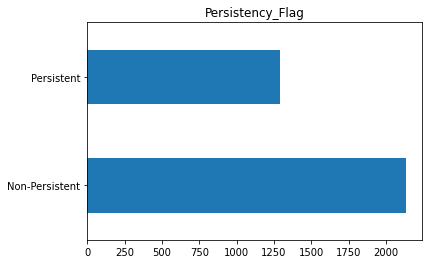

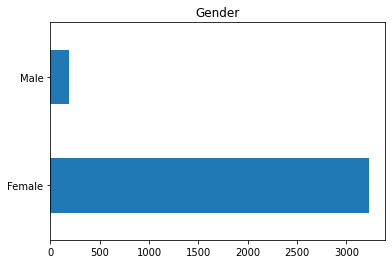

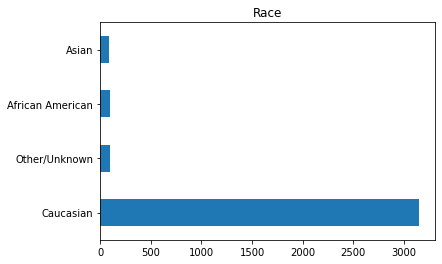

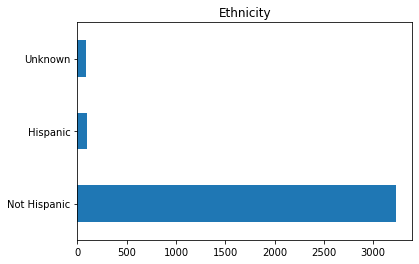

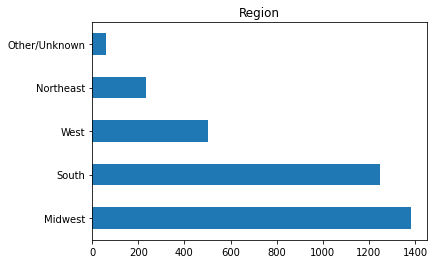

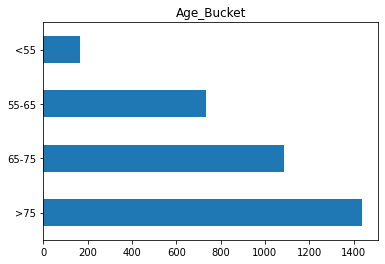

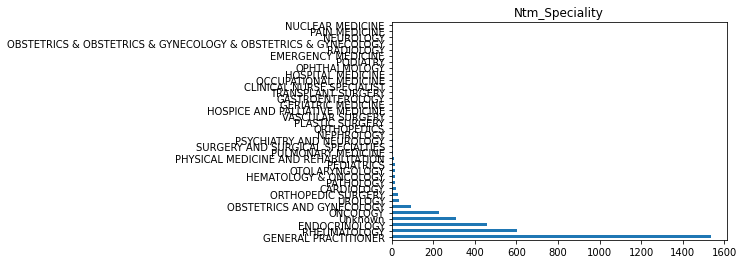

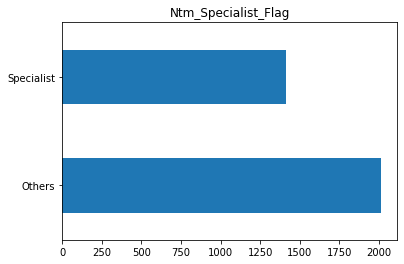

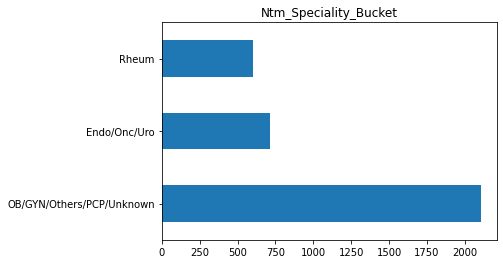

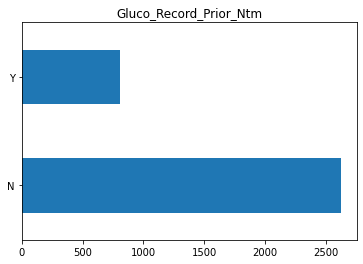

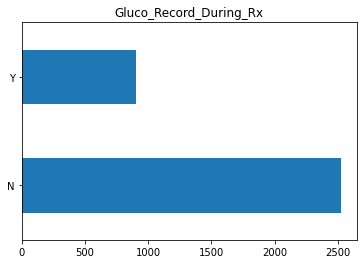

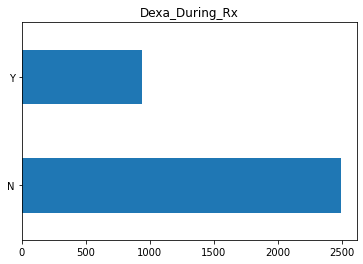

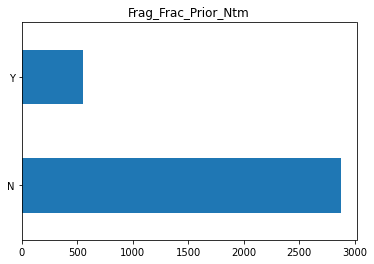

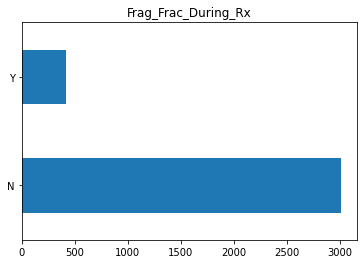

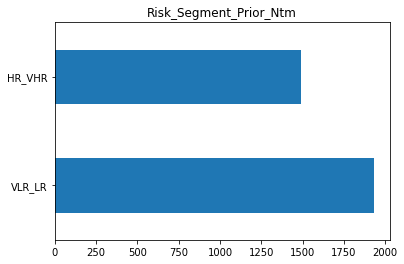

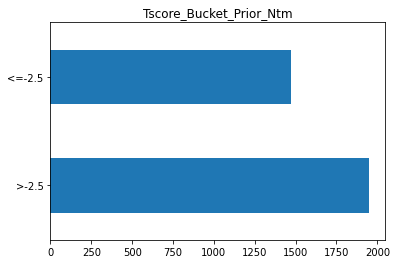

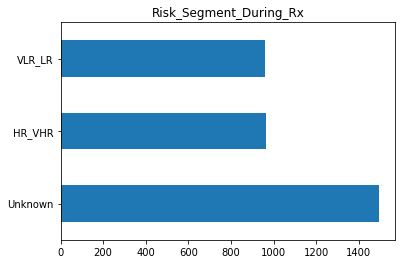

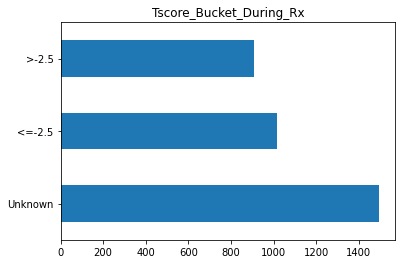

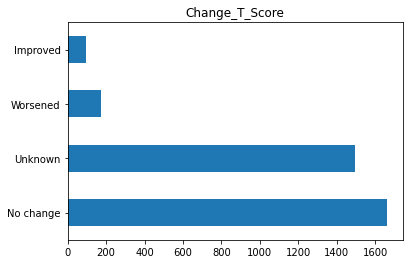

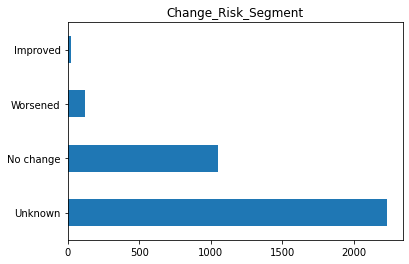

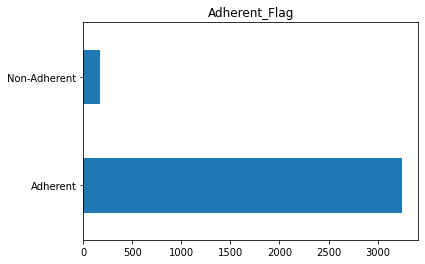

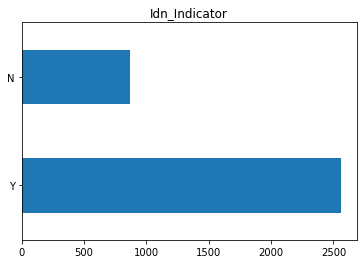

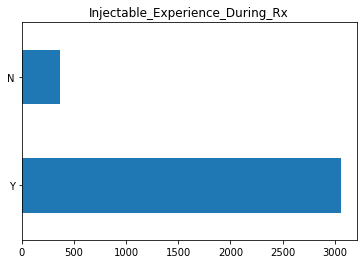

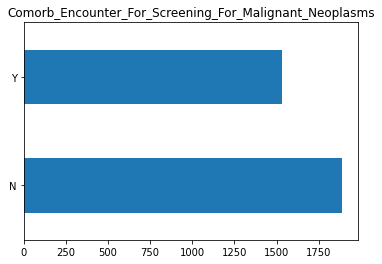

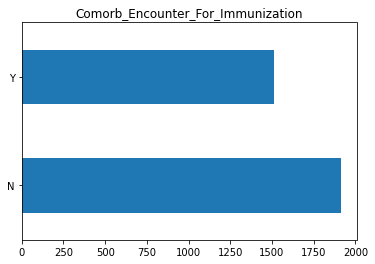

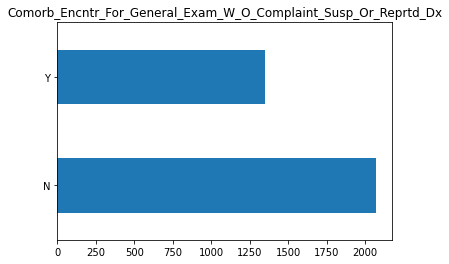

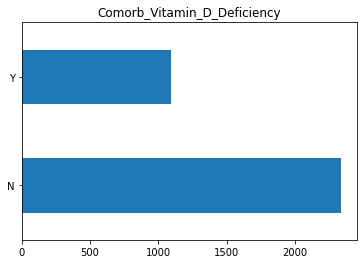

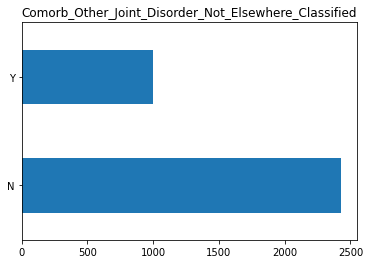

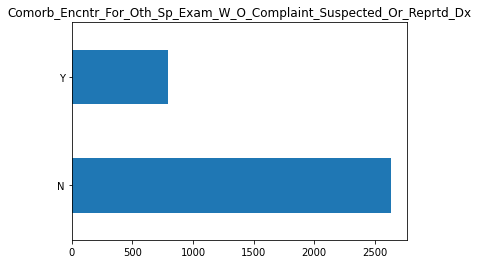

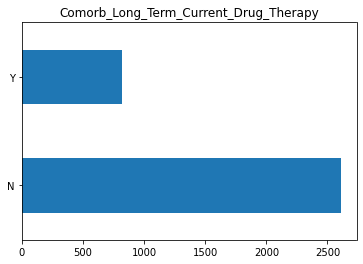

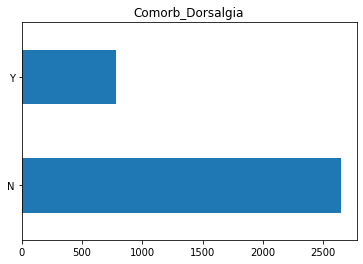

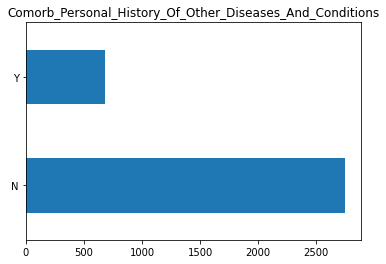

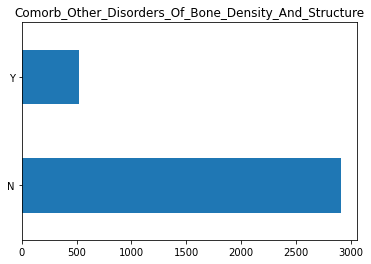

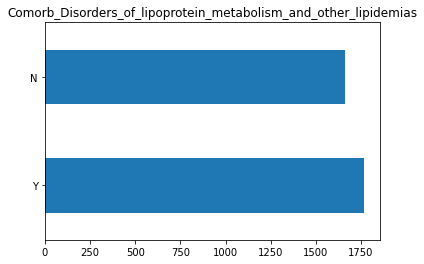

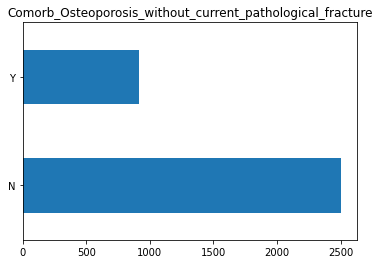

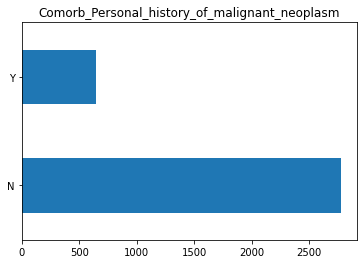

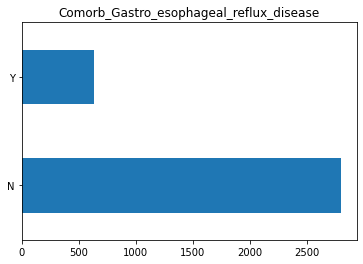

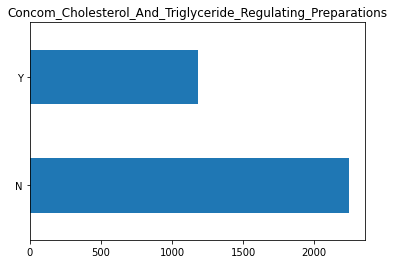

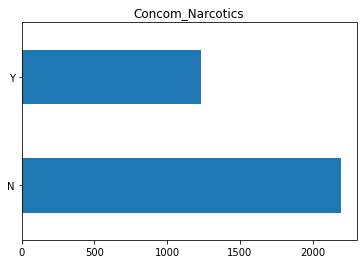

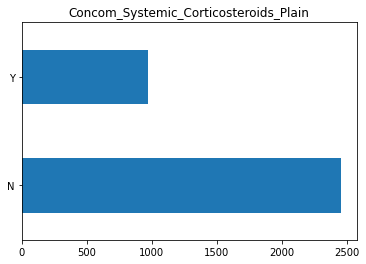

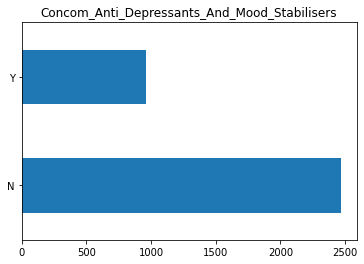

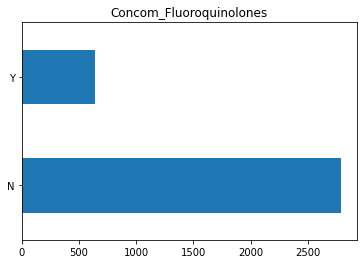

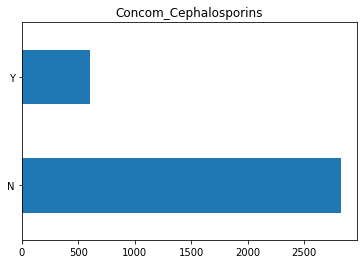

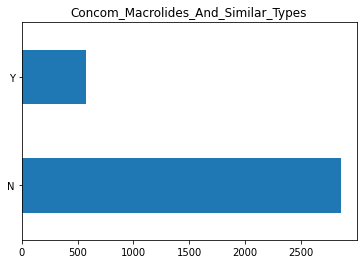

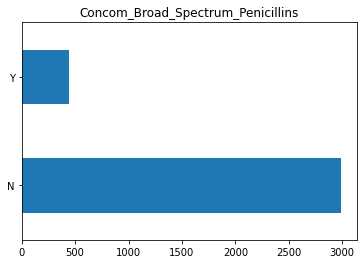

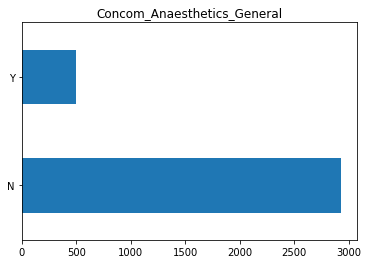

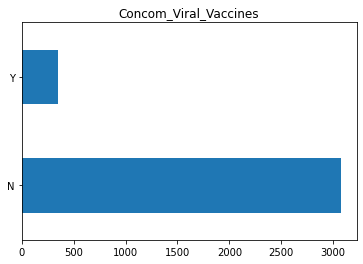

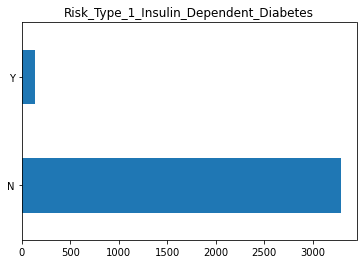

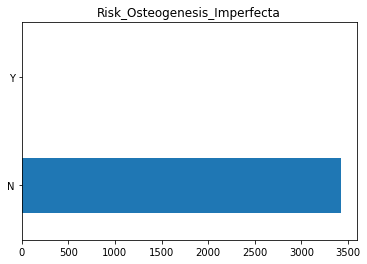

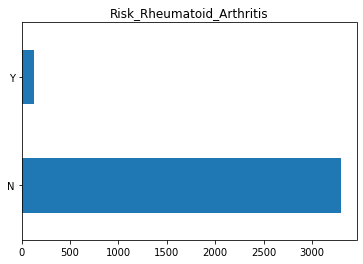

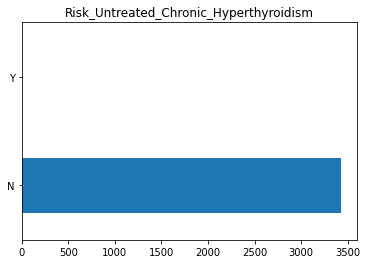

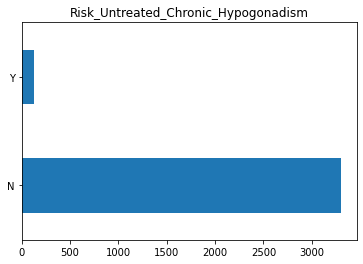

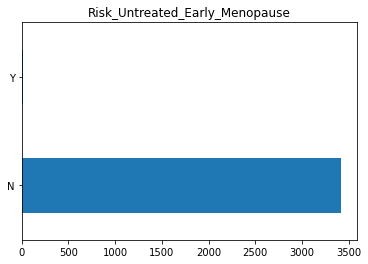

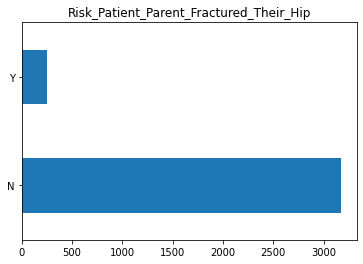

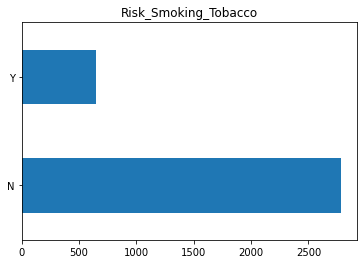

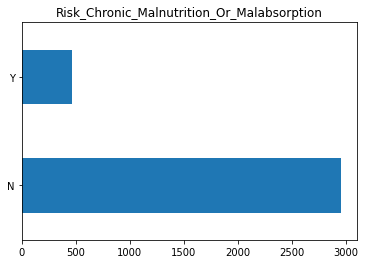

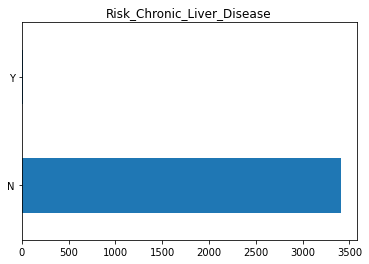

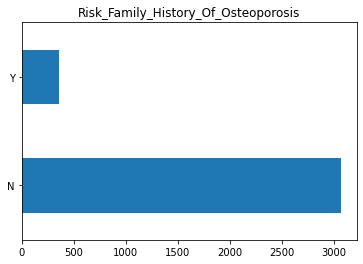

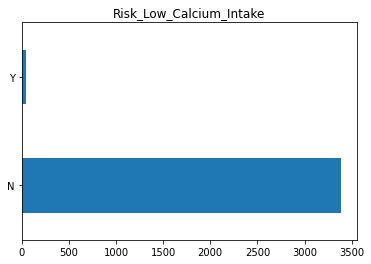

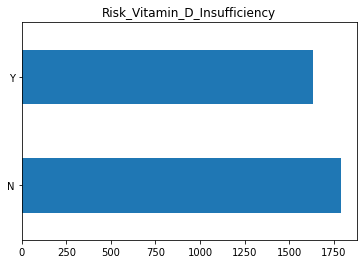

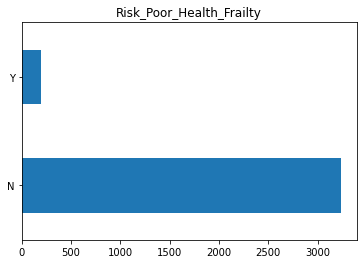

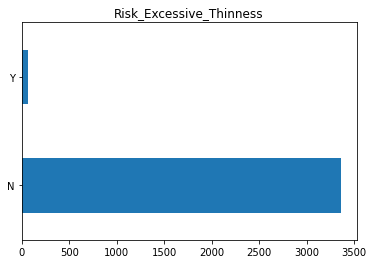

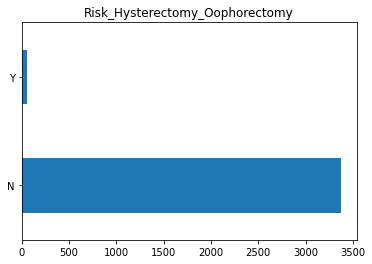

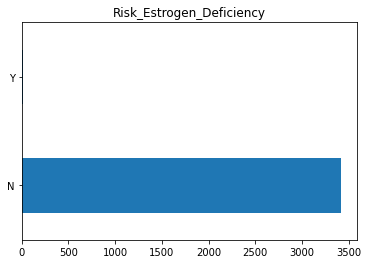

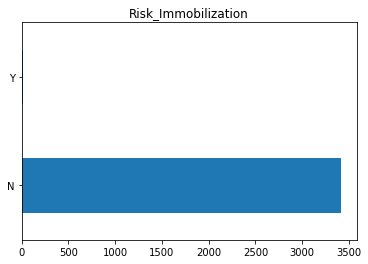

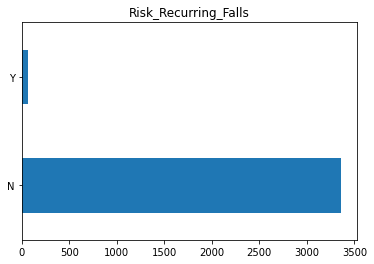

In [12]:
for m in mapping_list:
  df[m[1]].value_counts().plot(kind='barh',title=m[1]) #kind='barh'
  plt.show()
  plt.close()

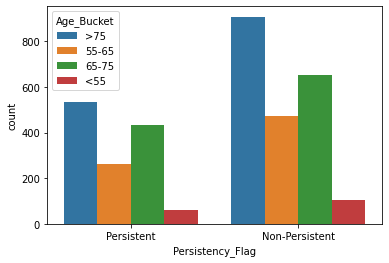

In [13]:
sns.countplot(x='Persistency_Flag', hue='Age_Bucket',  data=df)

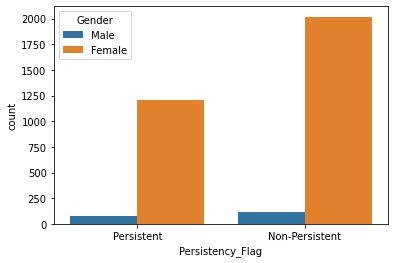

In [14]:
sns.countplot(x='Persistency_Flag', hue='Gender', data=df)

A glimps at the Visualized Data shows that : there are multiple unbalanced features for example there are much more data from Female than Male

# **4) Data mapping**

In [15]:
from sklearn.preprocessing import LabelEncoder

class MultiColLabelEncoder:
  def __init__(self,columns = None):
      self.columns = columns # array of column names to encode

  def fit(self,X,y=None):
      return self

  def transform(self,X):
      #Transforms columns of X specified in self.columns using LabelEncoder().
      #If no columns specified, transforms all columns in X.
      
      output = X.copy()
      if self.columns is not None:
          for col in self.columns:
              output[col] = LabelEncoder().fit_transform(output[col])
      else:
          for colname,col in output.iteritems():
              output[colname] = LabelEncoder().fit_transform(col)
      return output

  def fit_transform(self,X,y=None):
      return self.fit(X,y).transform(X)

In [16]:
df = MultiColLabelEncoder(columns= ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls']).fit_transform(df)

In [17]:
df = df.drop(['Ptid'], axis=1)

In [22]:
#for m in mapping_list:
  #df[m[1]] = df[m[1]].map(m[0])

In [23]:
#df=df.drop(['Ptid'], axis=1)

In [18]:
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Persistency_Flag                                                    3424 non-null   int64
 1   Gender                                                              3424 non-null   int64
 2   Race                                                                3424 non-null   int64
 3   Ethnicity                                                           3424 non-null   int64
 4   Region                                                              3424 non-null   int64
 5   Age_Bucket                                                          3424 non-null   int64
 6   Ntm_Speciality                                                      3424 non-null   int64
 7   Ntm_Specialist_Flag              

all columns are now integers
Lets have a list of skewd data and their skewness. the code below shows some that are moderatly or highly skewed which turns out to be many columns!

In [20]:
for i in range (1,68):
    skewness=df.iloc[:, i].skew(axis=0)
    if -1<skewness<=-0.5 or 0.5<=skewness<1:
        print( df.columns[i], "is MODERATLY skewed with skewness of",skewness)
    if skewness<-1 or skewness>1:
      print(df.columns[i], "is HIGHLY skewed with skewness of",skewness)

Gender is HIGHLY skewed with skewness of 3.8369837812442427
Race is HIGHLY skewed with skewness of -2.9846321539514293
Ntm_Speciality is MODERATLY skewed with skewness of 0.709122450536963
Gluco_Record_Prior_Ntm is HIGHLY skewed with skewness of 1.2498615724673199
Gluco_Record_During_Rx is HIGHLY skewed with skewness of 1.0745571716645235
Dexa_Freq_During_Rx is HIGHLY skewed with skewness of 6.8087302112992285
Dexa_During_Rx is HIGHLY skewed with skewness of 1.017463707118235
Frag_Frac_Prior_Ntm is HIGHLY skewed with skewness of 1.843387128143307
Frag_Frac_During_Rx is HIGHLY skewed with skewness of 2.3139573232272252
Adherent_Flag is HIGHLY skewed with skewness of 4.106079952174017
Idn_Indicator is HIGHLY skewed with skewness of -1.1355391558508359
Injectable_Experience_During_Rx is HIGHLY skewed with skewness of -2.535823384614954
Comorb_Vitamin_D_Deficiency is MODERATLY skewed with skewness of 0.7759428744424833
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified is MODERATLY skewe

Lets plot it

Persistency_Flag
0.5099703946295322


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


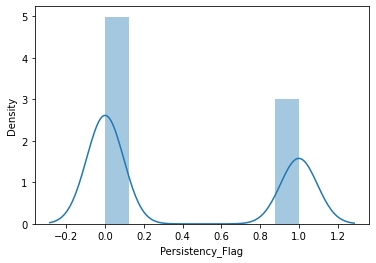

Gender
3.8353026550178706


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


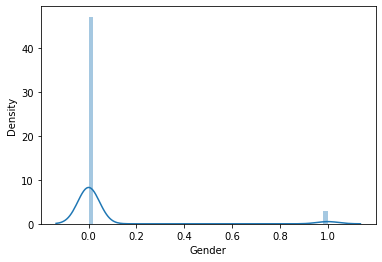

Race
-2.9833244748794954


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


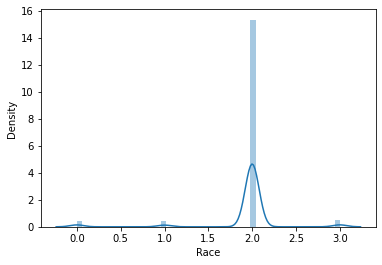

Ethnicity
-0.13155349022543453


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


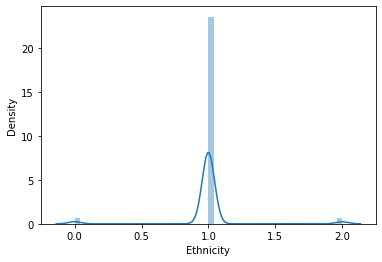

Region
-0.014126169543561802


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


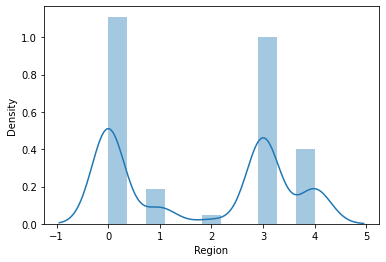

Age_Bucket
-0.0683250494322564


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


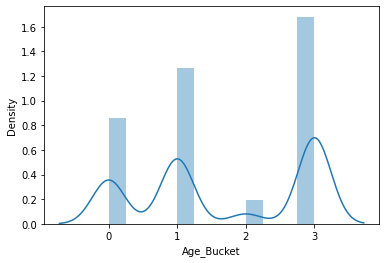

Ntm_Speciality
0.7088117574464331


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


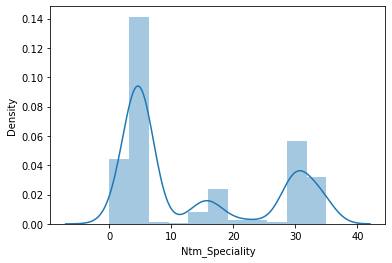

Ntm_Specialist_Flag
0.3571997094330317


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


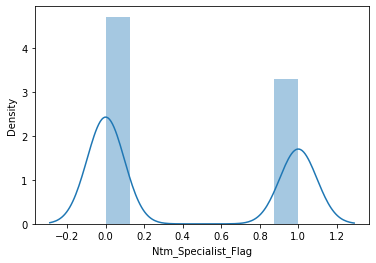

Ntm_Speciality_Bucket
0.021187895923276738


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


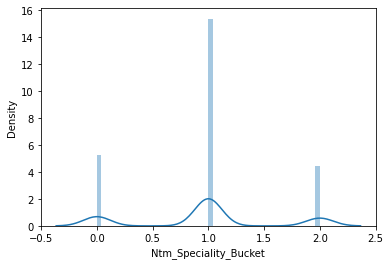

Gluco_Record_Prior_Ntm
1.2493139613257034


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


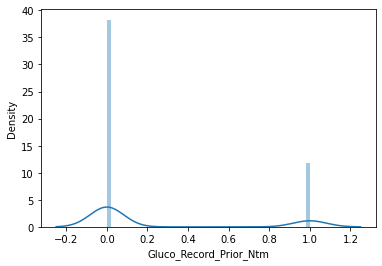

Gluco_Record_During_Rx
1.0740863679431598


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


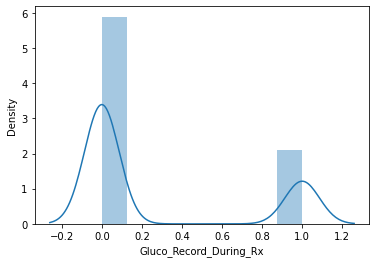

Dexa_Freq_During_Rx
6.805747051718919


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


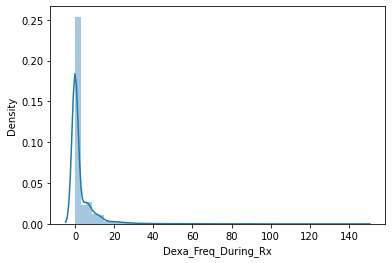

Dexa_During_Rx
1.0170179181808985


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


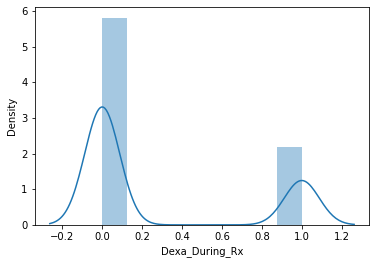

Frag_Frac_Prior_Ntm
1.8425794712379984


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


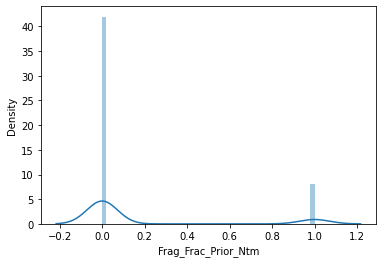

Frag_Frac_During_Rx
2.3129434919043517


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


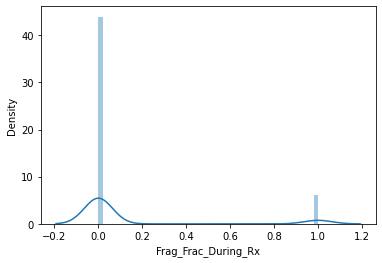

Risk_Segment_Prior_Ntm
-0.257960416665726


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


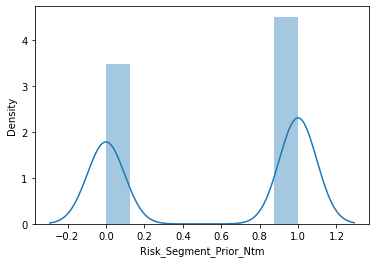

Tscore_Bucket_Prior_Ntm
-0.28196674344306005


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


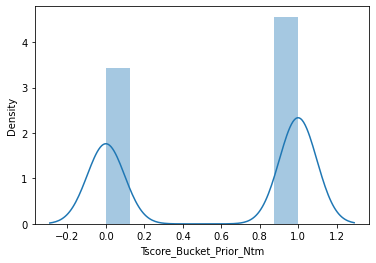

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Risk_Segment_During_Rx
0.0014285363876756017


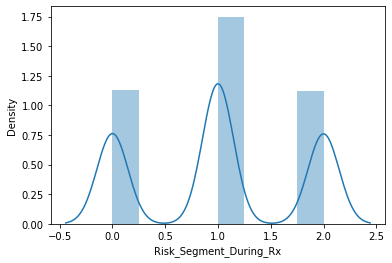

Tscore_Bucket_During_Rx
-0.2699956082106283


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


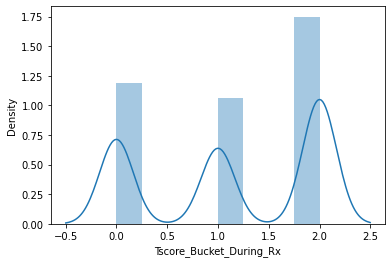

Change_T_Score
0.22727635522661718


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


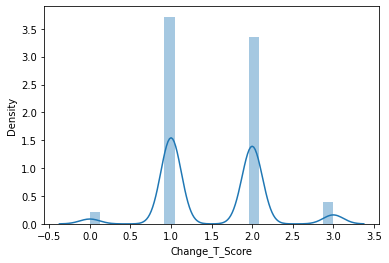

Change_Risk_Segment
-0.35653095692068315


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


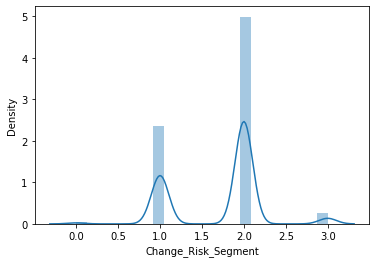

Adherent_Flag
4.1042809248419445


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


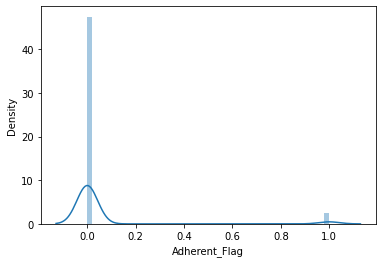

Idn_Indicator
-1.13504163363943


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


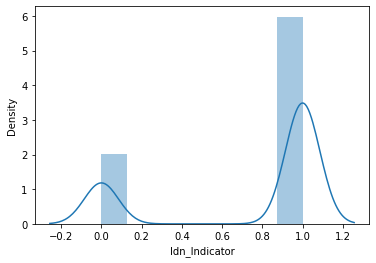

Injectable_Experience_During_Rx
-2.534712345465359


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


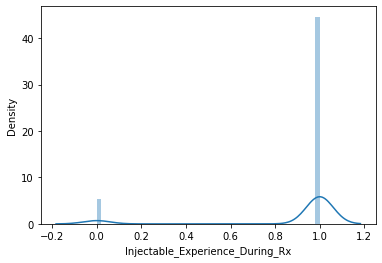

Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
0.21026461136145236


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


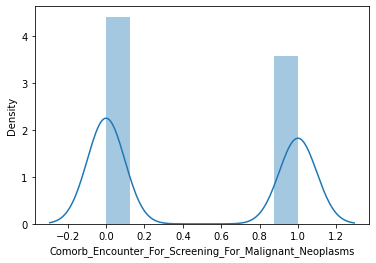

Comorb_Encounter_For_Immunization
0.23406326808688518


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


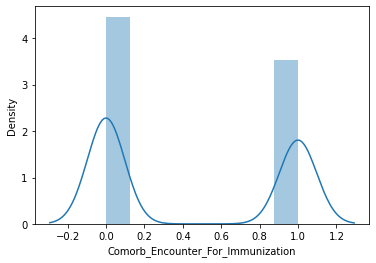

Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx
0.4301790687700617


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


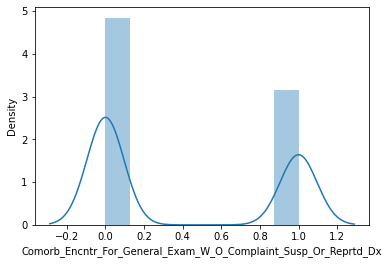

Comorb_Vitamin_D_Deficiency
0.775602904822917


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


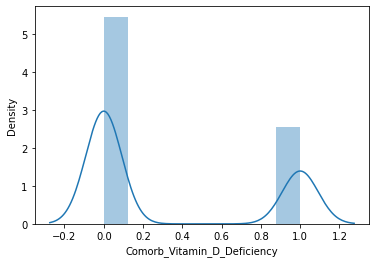

Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
0.9161802171592794


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


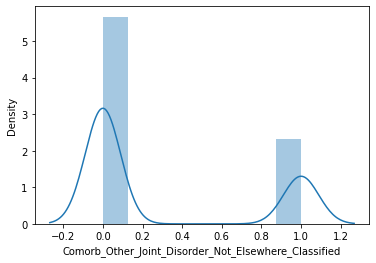

Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
1.2763681385962151


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


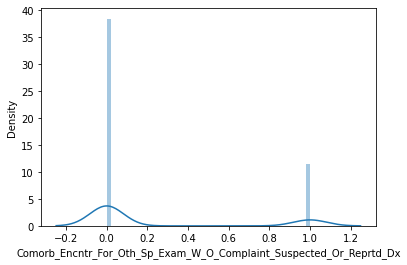

Comorb_Long_Term_Current_Drug_Therapy
1.2265111117989278


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


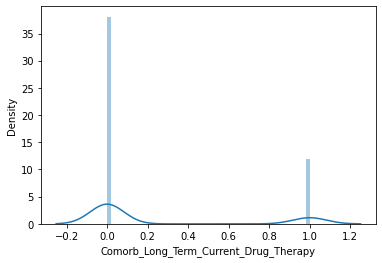

Comorb_Dorsalgia
1.2999602490234499


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


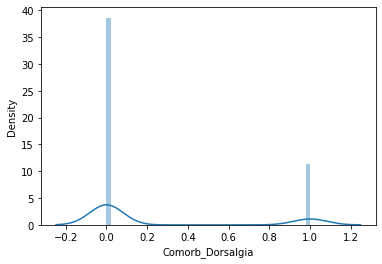

Comorb_Personal_History_Of_Other_Diseases_And_Conditions
1.5179123043065943


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


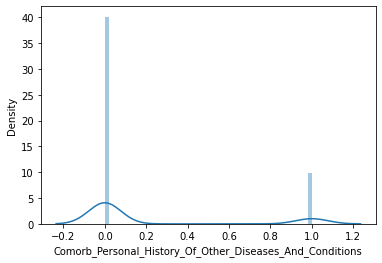

Comorb_Other_Disorders_Of_Bone_Density_And_Structure
1.9463531289759666


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


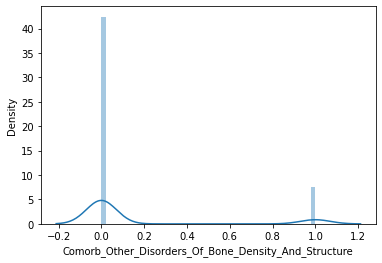

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
-0.06194557911087592


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


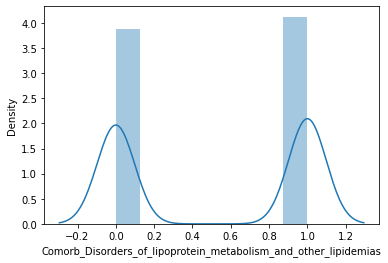

Comorb_Osteoporosis_without_current_pathological_fracture
1.048661417095289


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


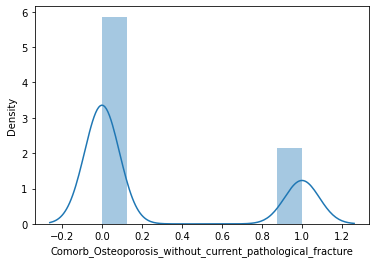

Comorb_Personal_history_of_malignant_neoplasm
1.5841978445572256


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


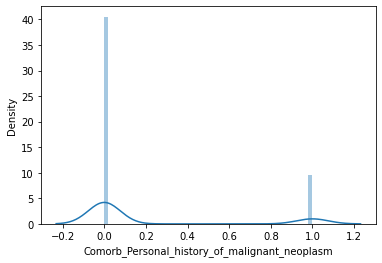

Comorb_Gastro_esophageal_reflux_disease
1.631074435198994


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


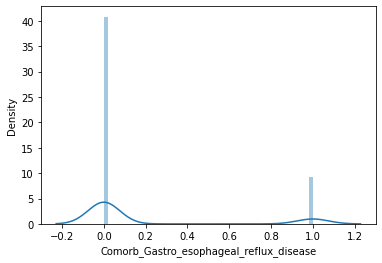

Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
0.6511474181142763


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


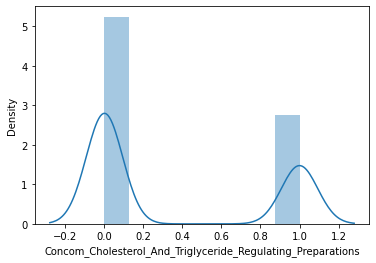

Concom_Narcotics
0.5828580271862722


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


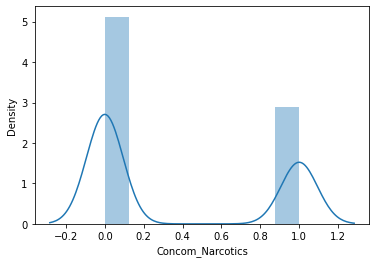

Concom_Systemic_Corticosteroids_Plain
0.9570758511703166


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


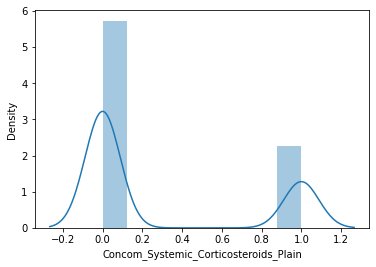

Concom_Anti_Depressants_And_Mood_Stabilisers
0.9795062387269503


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


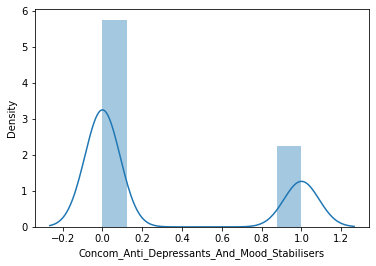

Concom_Fluoroquinolones
1.6136162521590458


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


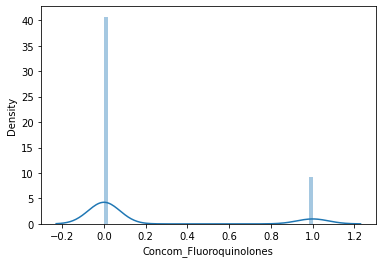

Concom_Cephalosporins
1.7005967417830503


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


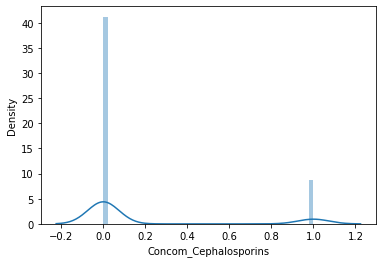

Concom_Macrolides_And_Similar_Types
1.7879143089993306


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


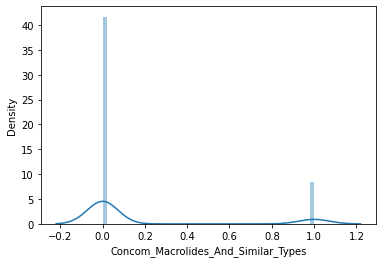

Concom_Broad_Spectrum_Penicillins
2.2240982657812833


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


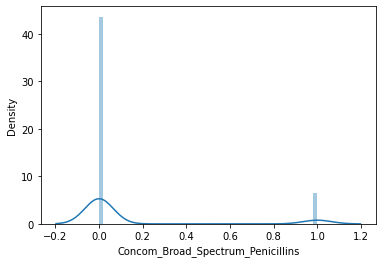

Concom_Anaesthetics_General
2.014729372526641


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


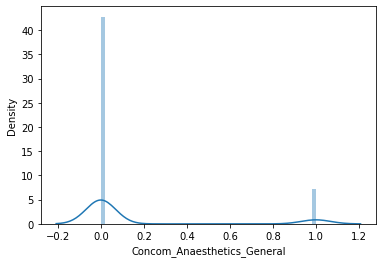

Concom_Viral_Vaccines
2.6104909472077855


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


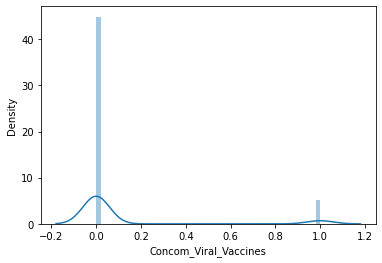

Risk_Type_1_Insulin_Dependent_Diabetes
4.655685456686586


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


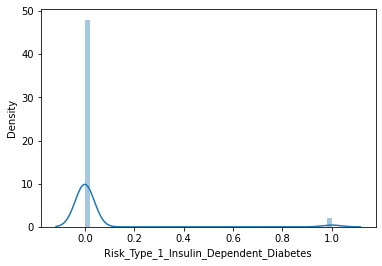

Risk_Osteogenesis_Imperfecta
33.739208797331045


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


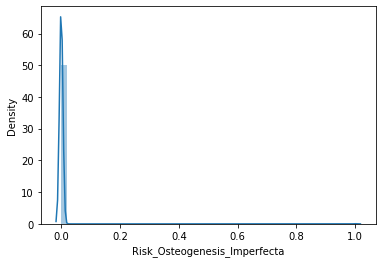

Risk_Rheumatoid_Arthritis
4.835072619275223


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


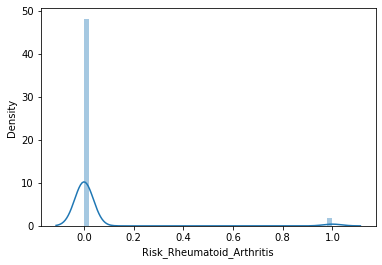

Risk_Untreated_Chronic_Hyperthyroidism
41.340060286041385


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


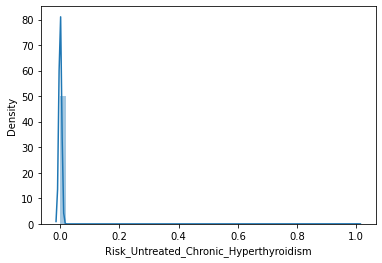

Risk_Untreated_Chronic_Hypogonadism
4.898892710379071


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


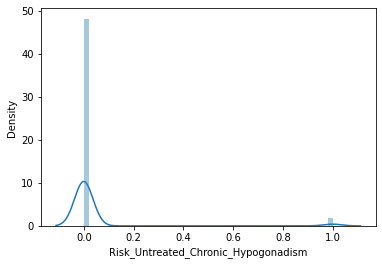

Risk_Untreated_Early_Menopause
16.80288220312698


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


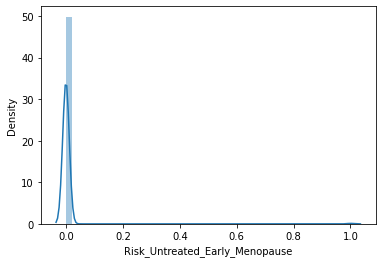

Risk_Patient_Parent_Fractured_Their_Hip
3.233544198060092


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


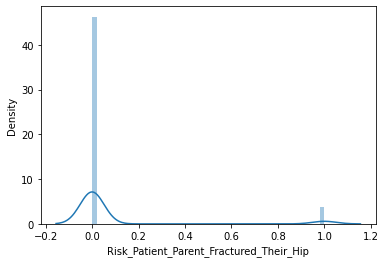

Risk_Smoking_Tobacco
1.5963786714293065


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


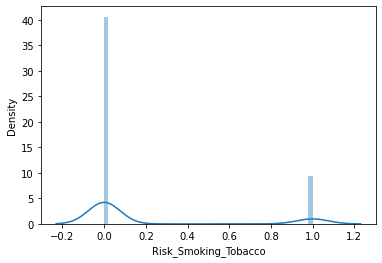

Risk_Chronic_Malnutrition_Or_Malabsorption
2.1081301381854427


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


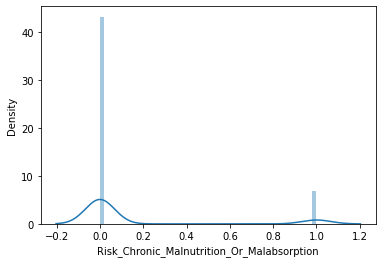

Risk_Chronic_Liver_Disease
13.683110282891333


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


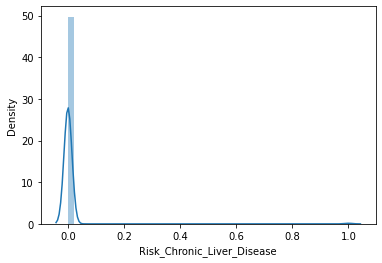

Risk_Family_History_Of_Osteoporosis
2.5847650423356954


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


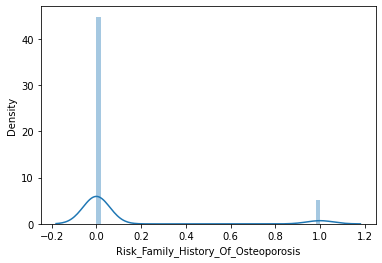

Risk_Low_Calcium_Intake
8.862066813727871


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


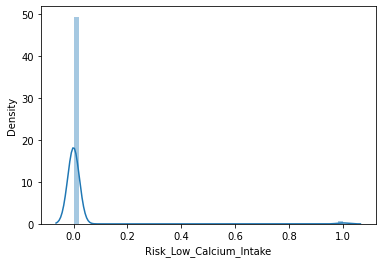

Risk_Vitamin_D_Insufficiency
0.08887266041925444


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


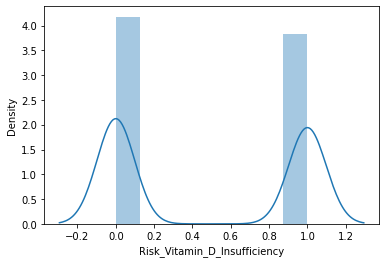

Risk_Poor_Health_Frailty
3.859111202586339


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


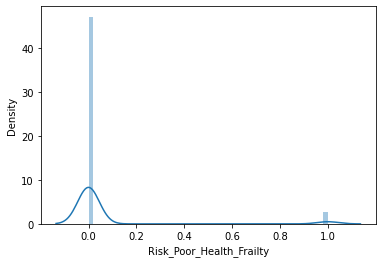

Risk_Excessive_Thinness
6.937177805710187


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


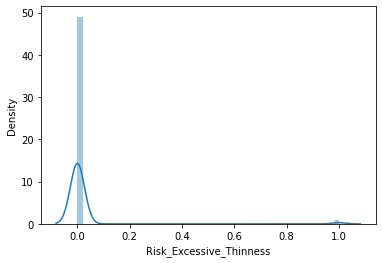

Risk_Hysterectomy_Oophorectomy
7.773251002397892


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


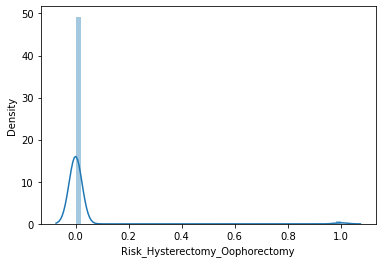

Risk_Estrogen_Deficiency
17.557788876840988


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


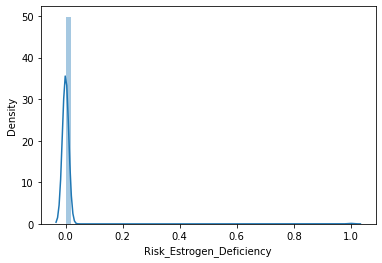

Risk_Immobilization
15.542700349143834


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


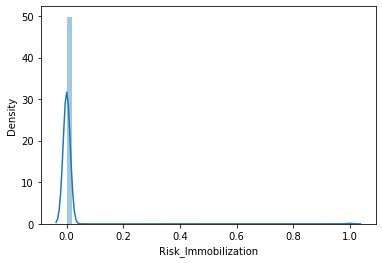

Risk_Recurring_Falls
6.829623322316103


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


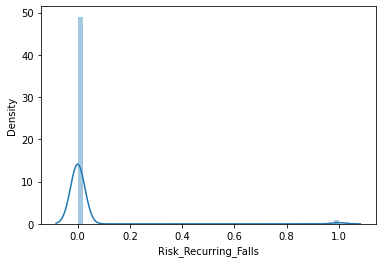

Count_Of_Risks
0.8794050541279611


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


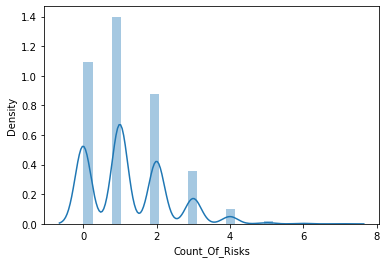

In [21]:
from scipy.stats import skew
for col in df:
  print(col)
  print(skew(df[col]))
  plt.figure()
  sns.distplot(df[col])
  plt.show()

Lets have a visualization about correlation of the features

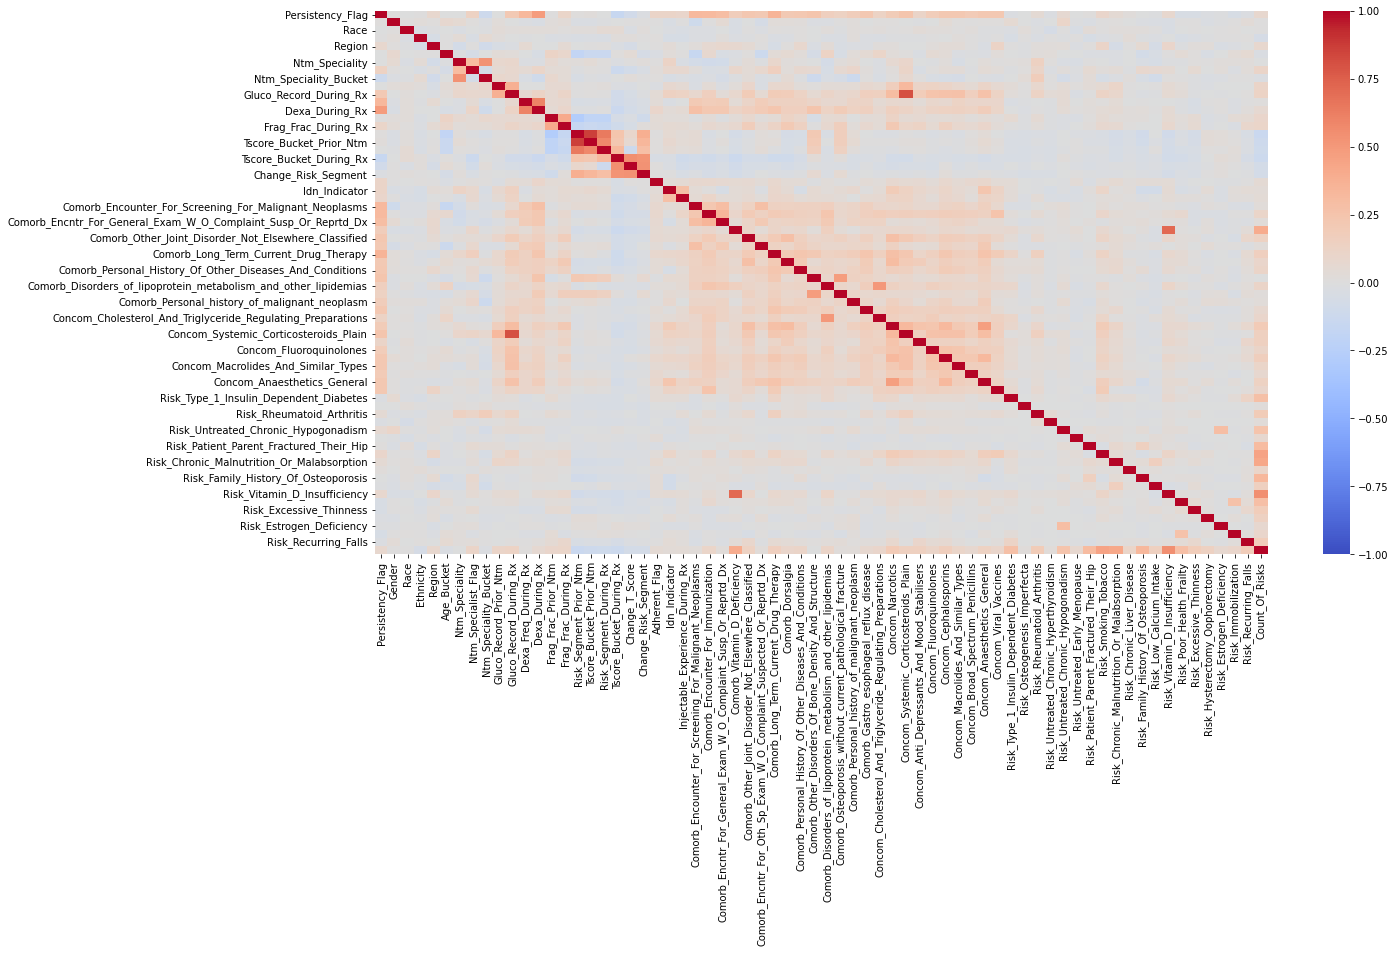

In [22]:
Corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr,annot=False,vmin=-1,vmax=1,cmap='coolwarm')

what we can understand from this correlation mapping is that our persistency flag is having correlation with some features. lets focus on corelation of persistency flag and other features:

In [23]:
print('Persistency_Flag correlation with other faetures are as follows')
for col in df:
  corr=df['Persistency_Flag'].corr(df[col])
  print(col,"    ",corr)

Persistency_Flag correlation with other faetures are as follows
Persistency_Flag      0.9999999999999999
Gender      0.010342754153113644
Race      -0.0020518715810954073
Ethnicity      0.0016298683465964256
Region      0.08441523815072496
Age_Bucket      -0.0019764631273448594
Ntm_Speciality      -0.003142716594215302
Ntm_Specialist_Flag      0.13938650464346217
Ntm_Speciality_Bucket      -0.11261682013062621
Gluco_Record_Prior_Ntm      -0.005757766657082073
Gluco_Record_During_Rx      0.2127038221864743
Dexa_Freq_During_Rx      0.33523463683000704
Dexa_During_Rx      0.49182290000772966
Frag_Frac_Prior_Ntm      0.00031789297035525406
Frag_Frac_During_Rx      0.10693549171397235
Risk_Segment_Prior_Ntm      0.012223004441533273
Tscore_Bucket_Prior_Ntm      0.018903304724425144
Risk_Segment_During_Rx      -0.0006995667161879956
Tscore_Bucket_During_Rx      -0.15167695605768952
Change_T_Score      -0.09029777739671391
Change_Risk_Segment      -0.01906713382033327
Adherent_Flag      0.112

it is important to remove skewness fom features with low correlation, removeing skewness from data with higher correlation will have higher impact and could be problematic. lets say we want to remove skewness from the features with correlation larger than treshold (a)

In [24]:
print('Persistency_Flag correlation with some faetures with low correlation are as follows')
a=0.01
min_corrs=[]
for col in df:
  corr=df['Persistency_Flag'].corr(df[col])
  if -a<=corr<=a:
      print(col,"    ",corr)
      min_corrs.append(col)


Persistency_Flag correlation with some faetures with low correlation are as follows
Race      -0.0020518715810954073
Ethnicity      0.0016298683465964256
Age_Bucket      -0.0019764631273448594
Ntm_Speciality      -0.003142716594215302
Gluco_Record_Prior_Ntm      -0.005757766657082073
Frag_Frac_Prior_Ntm      0.00031789297035525406
Risk_Segment_During_Rx      -0.0006995667161879956
Risk_Osteogenesis_Imperfecta      -0.0026359742497355583
Risk_Untreated_Early_Menopause      -0.005278896959174903
Risk_Patient_Parent_Fractured_Their_Hip      0.008310817324784326
Risk_Family_History_Of_Osteoporosis      -0.003492494285120339
Risk_Low_Calcium_Intake      -0.009919617285587169


In [25]:
for col in min_corrs:
    print(skew(df[col]))
    df[col]=np.sqrt(df[col])
    print(skew(df[col]))
    print()

-2.9833244748794954
-4.777935544706587

-0.13155349022543453
-4.193240488222092

-0.0683250494322564
-0.6819648408628066

0.7088117574464331
0.5225560881689445

1.2493139613257034
1.2493139613257034

1.8425794712379984
1.8425794712379984

0.0014285363876756017
-0.6432315858805809

33.739208797331045
33.739208797331045

16.80288220312698
16.80288220312698

3.233544198060092
3.233544198060092

2.5847650423356954
2.5847650423356954

8.862066813727871
8.862066813727871



with the above code, some features with low correlation with persistency flag skewness is optimized. however,some highly skewed features couldnet be better. at this point there is no more that can be done on the data to make the data balanced. we can not collect more data as we are already provided with the data. later on we can use different approaches such as trying different performance metrics as well as different sampling methods